Start Input Circuit
H
CNOT(0,1)
End input

Output Circuit
Rz(pi/2)
Rx(pi/2)
Rz(pi/2)
Rz(pi/2)
Rx(pi/2)
Rz(pi/2)
CZ(0, 1)
Rz(pi/2)
Rx(pi/2)
Rz(pi/2)


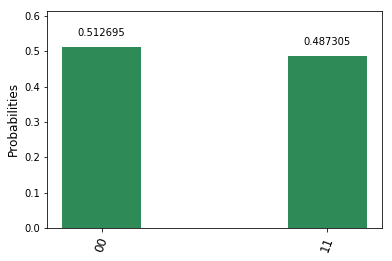

In [2]:
"""Implementation of the following circuit with using only RX, RY, CZ"""
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import plot_bloch_vector, plot_histogram
from matplotlib import pyplot
from qiskit import execute
from math import pi

backend = 'local_qasm_simulator'

strings = []

"""I gate implementation"""
def I_gate(q_cir, q_bit):
    strings.append('Rx(0)')
    q_cir.rx(0, q_bit)

"""H gate implementation"""
def H_gate(q_cir, q_bit):
    strings.append('Rz(pi/2)')
    q_cir.rz(pi/2, q_bit)
    strings.append('Rx(pi/2)')
    q_cir.rx(pi/2, q_bit)
    strings.append('Rz(pi/2)')
    q_cir.rz(pi/2, q_bit)

"""X gate implementation"""    
def X_gate(q_cir, q_bit):
    strings.append('Rx(pi)')
    q_cir.rx(pi, q_bit)

"""Y gate implementation"""    
def Y_gate(q_cir, q_bit):
    strings.append('Rz(-pi/2)')
    q_cir.rz(-pi/2, q_bit)
    strings.append('Rx(pi)')
    q_cir.rx(pi, q_bit)
    strings.append('Rz(pi/2)')
    q_cir.rz(pi/2, q_bit)

"""Z gate implementation"""    
def Z_gate(q_cir, q_bit):
    strings.append('Rz(pi)')
    q_cir.rz(pi, q_bit)

"""RX gate implementation"""    
def RX_gate(q_cir, q_bit, theta):
    strings.append('Rx(' + str(theta) + ')')
    q_cir.rx(theta, q_bit)

"""RY gate implementation"""    
def RY_gate(q_cir, q_bit, theta):
    strings.append('Rz(-pi/2)')
    q_cir.rz(-pi/2, q_bit)
    strings.append('Rx(' + str(theta) + ')')
    q_cir.rx(theta, q_bit)
    strings.append('Rz(pi/2)')
    q_cir.rz(pi/2, q_bit)

"""RZ gate implementation"""    
def RZ_gate(q_cir, q_bit, theta):
    strings.append('Rz(' + str(theta) + ')')
    q_cir.rz(theta, q_bit)

"""CNOT gate implementation"""    
def CNOT_gate(q_cir, q_ctl_bit, q_tgt_bit):
    H_gate(q_cir, q_tgt_bit)
    CZ_gate(q_cir, q_ctl_bit, q_tgt_bit)
    H_gate(q_cir, q_tgt_bit)

"""CZ gate implementation"""    
def CZ_gate(q_cir, q_ctl_bit, q_tgt_bit):
    strings.append('CZ(0, 1)')
    q_cir.cz(q_ctl_bit, q_tgt_bit)
    
"""Testing of above circuit """
q_r = QuantumRegister(2)
c_r = ClassicalRegister(2)

q_c = QuantumCircuit(q_r, c_r)

        
'''How to enter Quantum circuit string
   1. give only space between gates
   2. Rx, Ry, Rz takes theta as argument so put RX,theta where format where theta is in radian
   3. Cz, CNOT take control and target bit so enter CZ / CNOT,ctrl,tgt format 
      where control and target bit are either 0 or 1
   4. Only 2 qubits are used in this sample'''

"""Sample input for testing"""
#in_put = "X CNOT,0,1 RX,.98"
in_put = "H CNOT,0,1"
in_parse = in_put.split(' ')

print("Start Input Circuit")

for i in range(0, len(in_parse)):
    if (in_parse[i] == 'I'):
        print(in_parse[i])
        I_gate(q_c, q_r[0])
    elif (in_parse[i] == 'X'):
        print(in_parse[i])
        X_gate(q_c, q_r[0])
    elif (in_parse[i] == 'Y'):
        print(in_parse[i])
        Y_gate(q_c, q_r[0])
    elif (in_parse[i] == 'Z'):
        print(in_parse[i])
        Z_gate(q_c, q_r[0])
    elif (in_parse[i] == 'H'):
        print(in_parse[i])
        H_gate(q_c, q_r[0])
    elif (in_parse[i].find('RX') != -1):
        theta_val = float(in_parse[i][3:])
        print('RX' + '(' + in_parse[i][3:] + ')')
        RX_gate(q_c, q_r[0], theta_val)
    elif (in_parse[i].find('RY') != -1):
        theta_val = float(in_parse[i][3:])
        print('RY' + '(' + in_parse[i][3:] + ')')
        RY_gate(q_c, q_r[0], theta_val)
    elif (in_parse[i].find('RZ') != -1):
        theta_val = float(in_parse[i][3:])
        print('RZ' + '(' + in_parse[i][3:] + ')')
        RY_gate(q_c, q_r[0], theta_val)
    elif (in_parse[i].find('CZ') != -1):
        ctl_q = int(in_parse[i][3])
        tgt_q = int(in_parse[i][5])
        print('CZ' + '(' + in_parse[i][3] + ',' + in_parse[i][5] + ')')
        if (ctl_q == 0):
            CZ_gate(q_c, q_r[0], q_r[1])
        elif (ctl_q == 1):
            CZ_gate(q_c, q_r[1], q_r[0])
    elif (in_parse[i].find('CNOT') != -1):
        ctl_q = int(in_parse[i][5])
        tgt_q = int(in_parse[i][7])
        print('CNOT' + '(' + in_parse[i][5] + ',' + in_parse[i][7] + ')')
        if (ctl_q == 0):
            CNOT_gate(q_c, q_r[0], q_r[1])
        elif (ctl_q == 1):
            CNOT_gate(q_c, q_r[1], q_r[0])
            
print("End input")     

print('\n' + "Output Circuit")

for i in range (0, len(strings)):
    print(strings[i])

q_c.measure(q_r[0], c_r[0])
q_c.measure(q_r[1], c_r[1])

job = execute(q_c, backend)
result = job.result()
plot_histogram(result.get_counts(q_c))

